## The Sparks Foundation Internship (Data Science & Business Analytics)  

### Task1 - *Prediction using Supervised ML*
### Author - *Rahul*


#### Task :
<b>
    <ol>
      <li>Predict  the Percentage Score of a student based on the no. of study hours</li>
      <li>What will be predicted score if a student studies for 9.25 hrs/day?</li>
    </ol>
</b>


<b><hr></b>
<b><hr></b>

In [53]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Step 1: Gathering Data

In [54]:
# Loading the data set
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
student_data = pd.read_csv(url)
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Step 2: Analyzing the Data

In [55]:
# Checking for Null values
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### As we can see above that, there are no null values in the dataset.

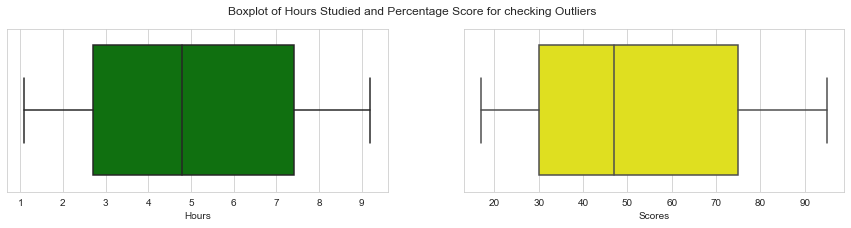

In [56]:
# Checking for Outliers in the data using Boxplot
fig, axes = plt.subplots(1,2, figsize = (15, 3))
fig.suptitle("Boxplot of Hours Studied and Percentage Score for checking Outliers")
sns.set_style('whitegrid')
sns.boxplot(ax = axes[0], x = student_data['Hours'], color = 'green')
sns.boxplot(ax = axes[1], x = student_data['Scores'], color = 'yellow')
plt.show()

### As we can see above that there are no outliers present in data.
<hr>

<AxesSubplot:>

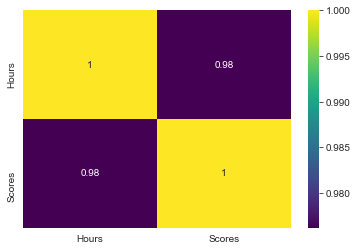

In [57]:
correlation = student_data.corr()
sns.heatmap(correlation, annot = True, cmap = "viridis")

#### Here, "Hours" and "Scores" got a 0.976191 correlation, which is a very good positive correlation so we can predict "Scores" based on the value of "Hours".

##### 

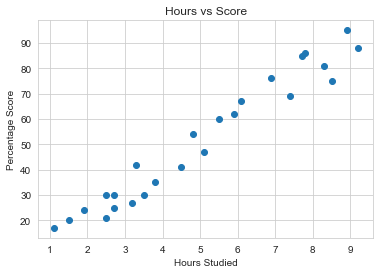

In [58]:
# plotting the distribution of student data using "Matplot Library"
plt.scatter(student_data['Hours'], student_data['Scores'])
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### The above scatter plot shows that if the Hours Studied increases then corresponding Percentage Score also increases. It also shows that there is a positive  linear dependency between "Hours" and "Scores".

# Step 3: Preparing that Data for Model Creation

In [59]:
# Data Prepareation for Model Creation
# Splitting the data into Independent(Input) variables and Dependent(Target) variable
x = student_data["Hours"].values.reshape(-1,1) # here 1 stands for only one column 
y = student_data["Scores"].values.reshape(-1,1)

In [60]:
# Splitting the data into Training and Testing Set by using Scikit-Learn's built-in train_test_split() method:
# It is sujjested that use 75% of the original data for the Training and remaining 25% data for the Testing
# Here, Splitting 20% of the original data into the Testing set and remaining data into the Training set

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("Shape of Datasets-->")
print("Training Set X : ", x_train.shape)
print("Training Set Y : ", y_train.shape)
print("Test Set X : ", x_test.shape)
print("Test Set Y : ", y_test.shape)

Shape of Datasets-->
Training Set X :  (20, 1)
Training Set Y :  (20, 1)
Test Set X :  (5, 1)
Test Set Y :  (5, 1)


# Step 4: Model Creation

In [61]:
# Model Creation (Simple Linear Regression using Scikit-Learn library)
model =  LinearRegression()
print("Model created successfully.")

Model created successfully.


# Step 5: Training the created Model

In [62]:
# Training the Model
model.fit(x_train, y_train)
print("Training completed.\n")

print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Training completed.

Coefficient:  [[9.91065648]]
Intercept:  [2.01816004]


# Step 6: Model visualization 

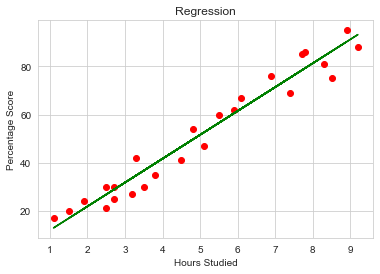

In [63]:
# Plotting the regression line on the Scatter Plot
# y = mx + c
line = (model.coef_*x) + model.intercept_  
# Plotting for the test data
plt.scatter(x, y, c = "Red")
plt.plot(x, line, c = "Green")
plt.title('Regression')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Step 7: Predicting the Test Dataset using created Model

In [64]:
y_predicted = model.predict(x_test)
print(y_predicted)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


# Step 8: Model Evaluation

In [65]:
# Comparing Actual vs Predicted values 
df = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_predicted.ravel()})  
# ravel() is used in Numpy to make any nD array into 1D array 
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [66]:
# Model Evaluation
print("R2_score : ", r2_score(y_test, y_predicted))

R2_score :  0.9454906892105355


<h3>Observation</h3>
<b><ul>
      <li>The Overall accuracy of this model is 94%</li>
</ul></b>

# Step 9: Final Prediction

In [67]:
# Predicting Percentage score if a student studies for 9.25 hrs/day
hour = np.array([9.25]).reshape(-1,1)
percentage = np.round(model.predict(hour), decimals = 1)
print(percentage)

[[93.7]]


### This Linear regression model predicts that if a student study for 9.25 hrs/day, then they will get approximately 93.7% score.